**Universidade Federal do Pará**

**Mestrado em Computação Aplicada PPCA/Tucuruí**

**Disciplina: Data Mining e Big**

Profº Dr. Adonney Allan de Oliveira Veras

Laciene Alves Melo

---

> Atividade Prática (Entrega no dia 10/03)

---



> Objetivo: Treinar uma base de dados para diagnótico de **câncer de Mama** benigno e Maligno.

> Descrição: Este script apresenta o tratamento de uma base de dados, desde o pré processamento, até a aplicação de dois algoritmos de inteligência computacional, sendo eles Árvore de Decisão e KNN.





# Pré Processamento de dados

In [ ]:
# importação das bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np

# importação de bibliotecas para o algoritmo de árvore de decisão e KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats

In [ ]:
# importacão da base de dados presente no google drive, e separação das colunas usando o parâmetro 'sep' para separar por vírgula.
data = pd.read_csv('/content/drive/MyDrive/disciplina_data_mining_big/datasets/breast-cancer-wisconsin.data',sep=",")
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
# para fins de facilitar a identificação dos atributos da base de dados, realizou-se a rotulagem das características necessárias 
# como esta disposto na linha de código abaixo.
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [ ]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


# Verificando se existe atributos **Ausentes**

In [ ]:
# Para verificar se existiam valores nulos, realizou-se o somatório de cada atributo com dados nulos
# o retorno indicou que não havia nenhum atributo nulo. 
data.isnull().sum()

Sample code                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# Identificação de amostras duplicadas

In [ ]:
# Verificou-se a existência de dados com código duplicado, onde o parâmetro 'keep' define todas as duplicatas como true
data[data.duplicated(['Sample code'],keep=False)]

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
3,1017023,4,1,1,3,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
28,1070935,1,1,3,1,2,1,1,1,1,2
29,1070935,3,1,1,1,1,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
688,654546,1,1,1,1,2,1,1,1,8,2
689,654546,1,1,1,3,2,1,1,1,1,2
690,695091,5,10,10,5,4,5,4,4,1,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# como soulução para a limpeza dos dados, considerou-se a remoção das linhas duplicadas
# utilizando atributo 'Sample code', onde o parâmetro 'keep' marca a primeira linhas duplicada como true, e o 'inplace=true' para o dataFrame de orgiem 
# permanecer inalterado, e uma nova instância dataFrame é retornada.
# 
data.drop_duplicates(subset='Sample code',keep='first',inplace=True)

# no final é possível verificar que a base de dados não apresenta mais amostras duplicadas
data[data.duplicated(['Sample code'],keep=False)]

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


# Tipagens Diferentes

In [ ]:
# Verificando se existe dados com tipagens diferentes que podem mascarar
# dados ausentes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 696
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  644 non-null    int64 
 1   Clump Thickness              644 non-null    int64 
 2   Uniformity of Cell Size      644 non-null    int64 
 3   Uniformity of Cell Shape     644 non-null    int64 
 4   Marginal Adhesion            644 non-null    int64 
 5   Single Epithelial Cell Size  644 non-null    int64 
 6   Bare Nuclei                  644 non-null    object
 7   Bland Chromatin              644 non-null    int64 
 8   Normal Nucleoli              644 non-null    int64 
 9   Mitoses                      644 non-null    int64 
 10  Class                        644 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.4+ KB


# Identificação de Valores Ausentes em ***Bare Nuclei***

In [ ]:
# Agrupando os dados de 'Bare Nuclei', verifico-se que este atributo apresenta dados ausentes do tipo 'object'
# que podem compromenter o processo de classificação
bareNuclei = data.groupby(['Bare Nuclei']).size()

bareNuclei


Bare Nuclei
1     361
10    126
2      27
3      28
4      19
5      28
6       4
7       8
8      19
9       8
?      16
dtype: int64

In [ ]:
# para tratar os dados ausentes em 'Bare Nuclei'. Utilizou-se a moda
# onde o dado que mais repetia era o valor 1, neste caso o caractere '?' foi subtituido pelo valor da moda. 

# obs.: todos os valores numéricos estavam no tipo 'string', por isso a atraibuição foi '1' string
data.loc[data['Bare Nuclei'] == '?', 'Bare Nuclei']='1'

bareNuclei = data.groupby(['Bare Nuclei']).size()
bareNuclei

Bare Nuclei
1     377
10    126
2      27
3      28
4      19
5      28
6       4
7       8
8      19
9       8
dtype: int64

In [ ]:
# Após os valores ausentes serem substituidos, fez-se a conversão
# de todos os atributos de 'Bare Nuclei' para inteiro
x = data['Bare Nuclei']

# pecorreu-se o array e fez-se a coversão para inteiro
valores = []
for val in x:
    valores.append(int(val))

data['Bare Nuclei']=valores

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bare Nuclei'>

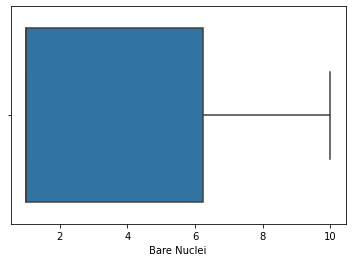

In [ ]:
# plotagem do gráfico boxplot mostrando a normalização do atributo 'Bare Nuclei'
srn.boxplot(data['Bare Nuclei'])

# Identificação de ***Outliers*** no campo ***Mitoses*** - Utilização de Desvio Padrão e Mediana

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mitoses'>

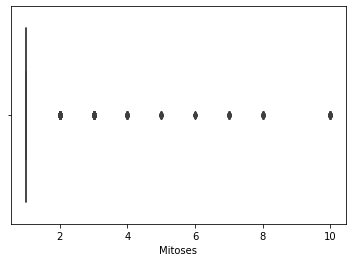

In [ ]:
# identificação da Outliers no gráfico boxplot,
# É possível notar que o gráfico de boxplot ficou achatado no eixo de x
srn.boxplot(data['Mitoses'])

In [ ]:
# para normalizar os dados optou-se por aplicar o método de desvio padrão no atributo 'Mitoses'
desvp = sts.stdev(data['Mitoses'])

desvp

1.7452432104950484

In [ ]:
# multiplicou-se o valor dos atributos da coluna 'Mistoses' pelo desvio padrão
data.loc[data['Mitoses']>=2*desvp]

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
7,1033078,2,1,1,1,2,1,1,1,5,2
13,1044572,8,7,5,10,7,9,5,5,4,4
19,1054590,7,3,2,10,5,10,5,4,4,4
49,1108370,9,5,8,1,2,3,2,1,5,4
52,1110503,5,5,5,8,10,8,7,3,7,4
56,1113038,8,2,4,1,5,1,5,4,4,4
64,1116998,10,4,2,1,3,2,4,3,10,4
67,1120559,8,3,8,3,4,9,8,9,8,4
70,1123061,6,10,2,8,10,2,7,8,10,4
83,1147699,3,5,7,8,8,9,7,10,7,4


In [ ]:
# obteve-se a mediana
median=sts.median(data['Mitoses'])
median

1.0

In [ ]:
# substitui-se a mediana para cada dado do atributo 'Mitoses', 
# alocando os novos dados de forma temporária
data.loc[data['Mitoses']>=2*desvp,'Mitoses']=median
data.loc[data['Mitoses']>=2*desvp]

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mitoses'>

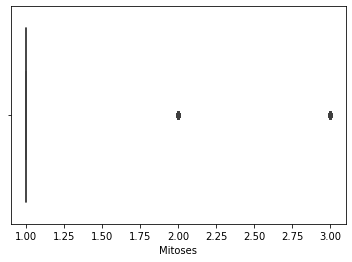

In [ ]:

# Plotado os dados no boxplot, foi possível notar uma redução na quantidade de outliers
srn.boxplot(data['Mitoses'])

# Separação de previsores e classe

In [ ]:
# nesta etapa realizou-se a atribuição do array classificadores de câncer Benigno (2) e Maligno (4), para a variável classe
classe = data['Class']

# Removeu-se da base de dados os atributos quw não contribuiriam para a estimativa de treinamento e teste,
# neste caso, 'Sample code' (este é o id de cada linha) e a 'Class', que já foi separado acima.
previsores = data.drop(['Sample code', 'Class'], axis=1)

In [ ]:
# previsores

classe

0      2
1      2
2      2
3      2
4      4
      ..
692    2
693    2
694    2
695    4
696    4
Name: Class, Length: 644, dtype: int64

# Divisão da base de dados entre treinamento e teste

In [ ]:
# Para fazer a divisão da base de dados em treino e teste, considerou-se os seguintes atributos de entrada.
#   - previsores: array de atrbutos com as características das celulas cancerígenas.
#   - classe: array de classificação do tipo de câncer, maligno ou benigno.
#   - test_size: porcentagem da base de dados destinada para teste, neste caso 30% e 70%, para teste e treino respectivamente.
#   - random_state: os dados para o modelo serão distribuídos de forma aleatória.
X_train, X_test, y_train, y_test = train_test_split(previsores,
                                                    classe,
                                                    test_size = 0.3,
                                                    random_state = 0)

# **Aplicação do Algoritmo AD (Árvore de Decisão)**

---



In [ ]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


## Aplicação Modelo de AD



In [ ]:
# Criação do modelo, e realizacão do treinamento

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Apartir do treinamento do modelo, realizou-se a predição da classificação 
# da base de teste
previsionAD = tree.predict(X_test)
previsionAD

array([2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2])

# Matriz de Confusão AD

In [ ]:
# Na matriz de confusão é possível observar que o modelo:
#     Acertou 125 diagnósticos de câncer Benigno => TP (Verdadeiro Positivo)
#     Errou 4 diagnósticos de câncer Benigno => FP (Falso Positivo)
#     Errou 5 diagnósticos de câncer Maligno => FN (Falso Negativo)
#     Acertou 60 diagnósticos de câncer Maligno => TN (Verdadeiro Negativo)

confusionAD=confusion_matrix(y_test,previsionAD)
confusionAD

array([[125,   4],
       [  5,  60]])

# Taxa de **Accuracy** do  modelo de AD para teste



In [ ]:
# Taxa de acerto do modelo
accuracyAD = accuracy_score(y_test,previsionAD)
accuracyAD

0.9536082474226805

# Relatório do modelo de AD

In [ ]:
# Modelo conseguiu identificar 97% dos câncers benignos (classe 2), bem como, 93% dos câncers malignos (classe 4)
# o modelo teve 95% de precisão
print(classification_report(y_test, previsionAD))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       129
           4       0.94      0.92      0.93        65

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194



# **Aplicação do Algoritmo KNN (K-Nearest Neighbors)**

---



# Modelo de KNN

In [ ]:
# Criação do modelo, e realizacão do treinamento
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Apartir do treinamento do modelo, realizou-se a predição da classificação 
# da base de teste
previsionKNN = knn.predict(X_test)
previsionKNN

array([2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2])

# **Matriz de Confusão KNN**

In [ ]:
# Na matriz de confusão é possível observar que o modelo:
#     Acertou 127 diagnósticos de câncer Benigno => TP (Verdadeiro Positivo)
#     Errou 2 diagnósticos de câncer Benigno => FP (Falso Positivo)
#     Errou 5 diagnósticos de câncer Maligno => FN (Falso Negativo)
#     Acertou 58 diagnósticos de câncer Maligno => TN (Verdadeiro Negativo)

confusionKNN=confusion_matrix(y_test,previsionKNN)
confusionKNN

array([[127,   2],
       [  7,  58]])

# Taxa de Accuracy do Modelo KNN para teste

In [ ]:
# Taxa de acerto do modelo
accuracyKNN = accuracy_score(y_test,previsionKNN)
accuracyKNN

0.9536082474226805

# Relatório do Modelo KNN

In [ ]:
# Modelo conseguiu identificar 97% dos câncers benignos (classe 2), bem como, 93% dos câncers malignos (classe 4)
# o modelo teve 95% de precisão
print(classification_report(y_test, previsionKNN))

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       129
           4       0.97      0.89      0.93        65

    accuracy                           0.95       194
   macro avg       0.96      0.94      0.95       194
weighted avg       0.95      0.95      0.95       194



# **Conclusão**


Para o diagnóstico de câncer de mama benigno, o mais indicado é utlizar o algoritmo de KNN, enquanto que para o dignóstico de cancêr de mama maligno  o mais adequado é o algoritmo de Árvore de Decisão.